# Based on https://jni.github.io/i2k-skimage-napari/lectures/2_segmentation_and_regionprops.html

In [ ]:
import numpy as np
from scipy import ndimage as ndi

import napari

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [2]:
%gui qt

In [3]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

viewer = napari.Viewer()
image_layer = viewer.add_image(image)
labels_layer = viewer.add_labels(labels)
labels_as_image_layer = viewer.add_image(
    labels, name='labels as image'
)

In [4]:
from skimage import filters
edges = filters.scharr(image)

In [6]:
viewer.add_image(
    edges,
    blending='additive',
    colormap='magenta',
)

<Image layer 'edges' at 0x129ad0050>

In [7]:
denoised = ndi.median_filter(labels, size=3)
li_thresholded = denoised > filters.threshold_li(denoised)

/Users/fernandes/anaconda3/envs/napari/lib/python3.7/site-packages/skimage/filters/thresholding.py:639: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


In [8]:
viewer.add_image(
    li_thresholded,
    opacity=0.3,
)

<Image layer 'li_thresholded' at 0x122563f50>

In [10]:
from skimage import measure

labels = measure.label(image)

viewer.add_labels(
    labels,
    opacity=0.5,
)



<Labels layer 'labels [2]' at 0x12a90f650>

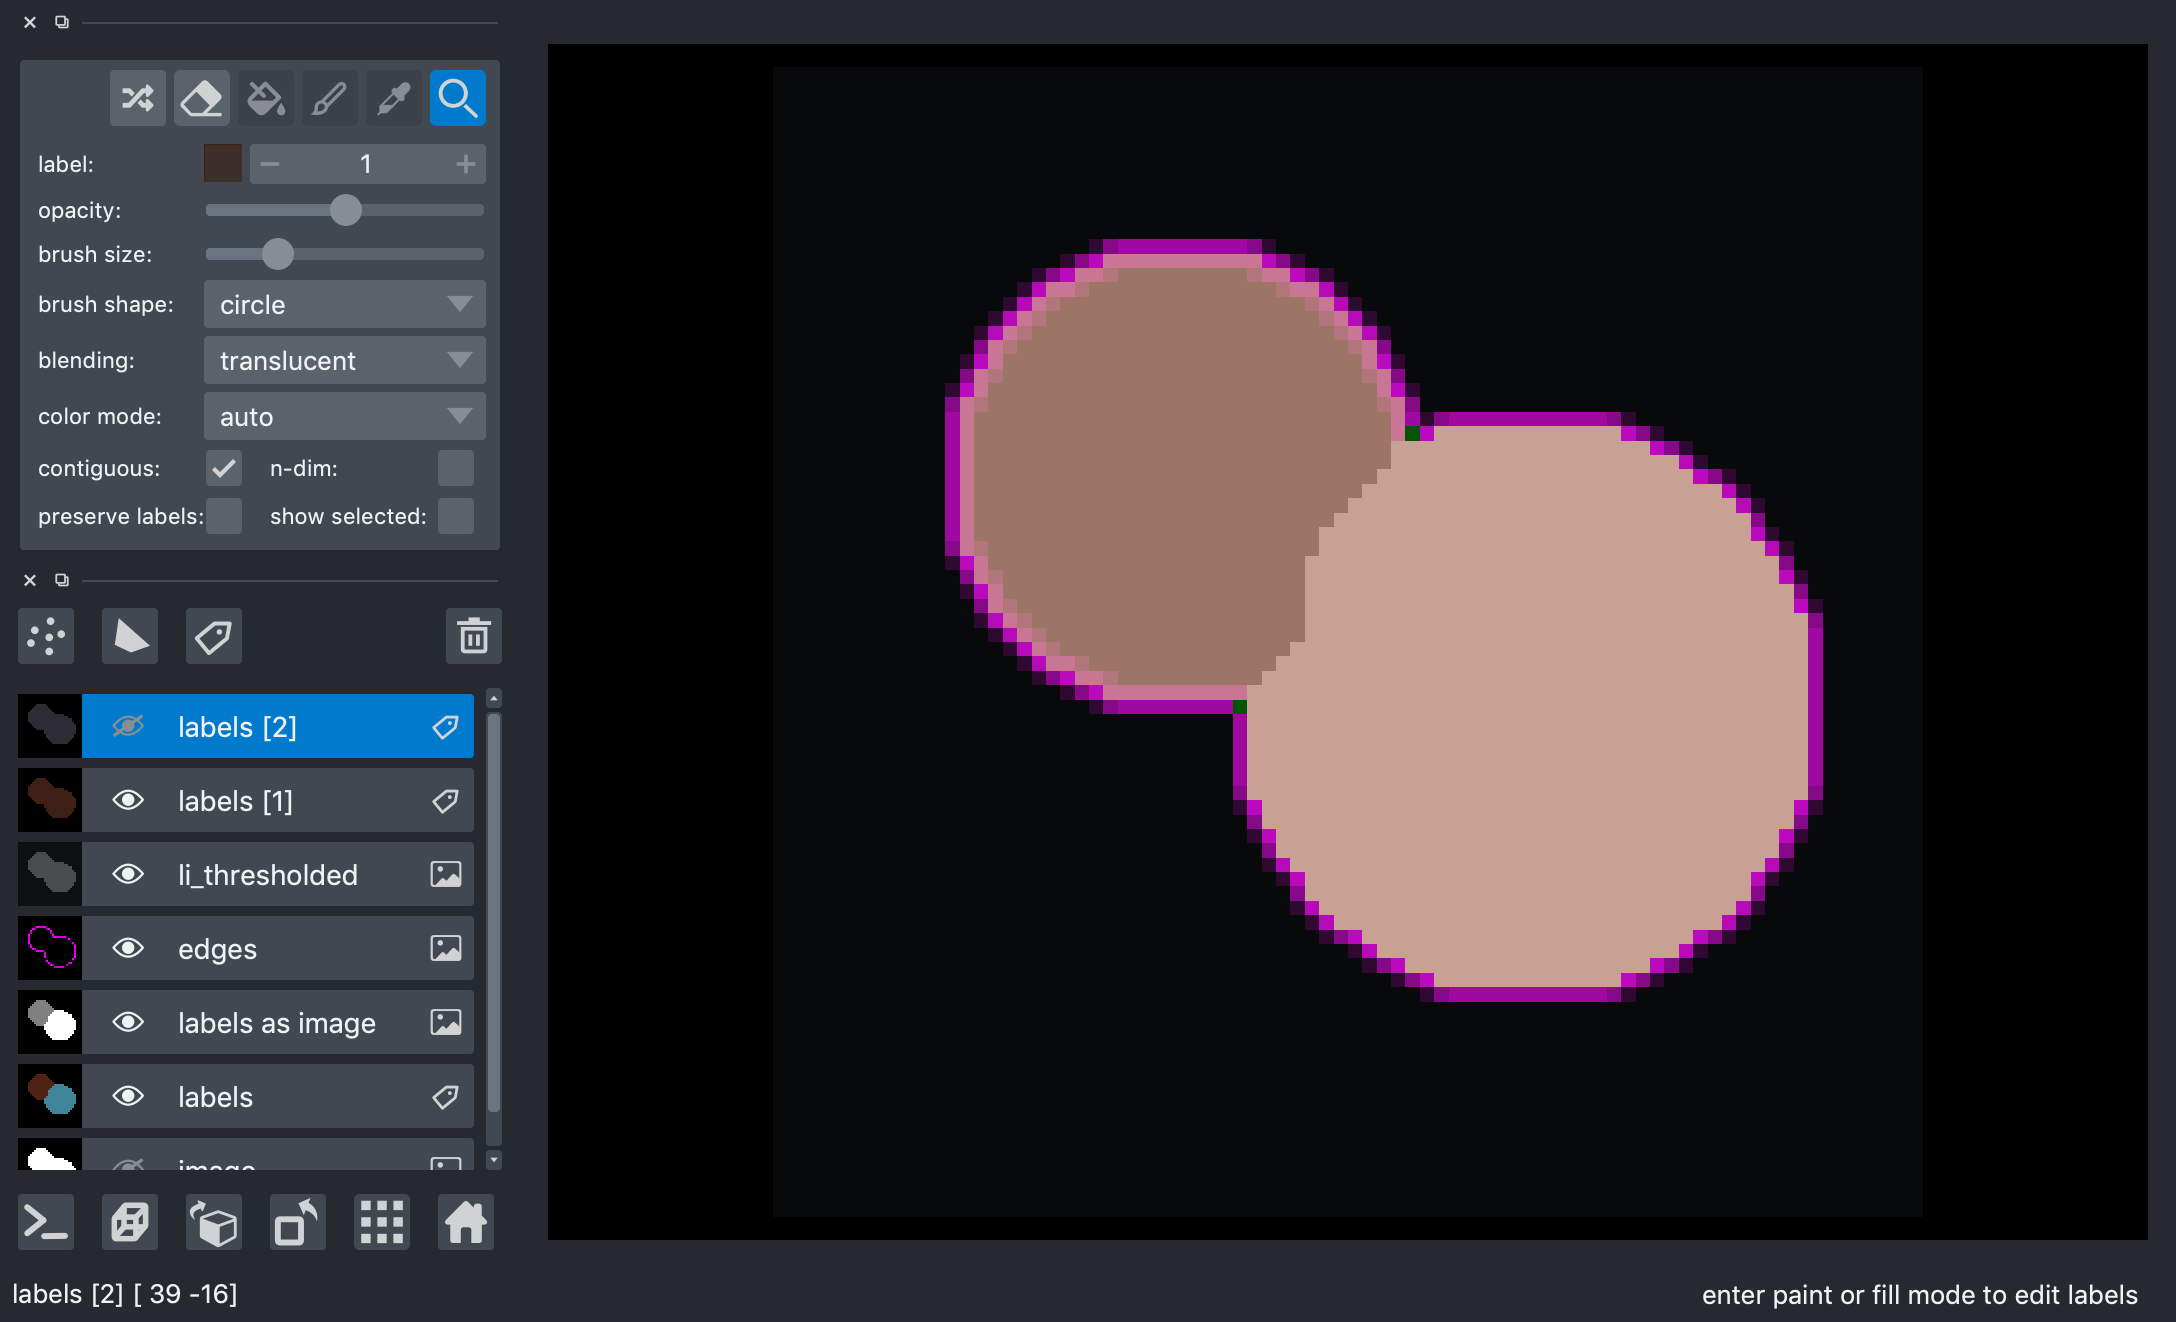

In [15]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)